In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dataset import OcelotSpaceChargeQuadrupoleDataset

In [2]:
dataset = OcelotSpaceChargeQuadrupoleDataset(stage="validation", normalize=False)

In [3]:
energies = []
charges = []
sigma_xs = []
sigma_ys = []

sigma_x_errors = []
sigma_xp_errors = []
sigma_y_errors = []
sigma_yp_errors = []
sigma_s_errors = []
sigma_p_errors = []
for (incoming, controls), outgoing_deltas in dataset:
    energies.append(incoming[7].item())
    charges.append(incoming[6].item())
    sigma_xs.append(incoming[0].item())
    sigma_ys.append(incoming[2].item())

    sigma_x_errors.append(outgoing_deltas[0].item())
    sigma_xp_errors.append(outgoing_deltas[1].item())
    sigma_y_errors.append(outgoing_deltas[2].item())
    sigma_yp_errors.append(outgoing_deltas[3].item())
    sigma_s_errors.append(outgoing_deltas[4].item())
    sigma_p_errors.append(outgoing_deltas[5].item())

In [4]:
np.array(sigma_xs).min(), np.array(sigma_xs).mean(), np.array(sigma_xs).max()

(1.0043365364253987e-05, 0.0005059208523811321, 0.0010059630731120706)

In [5]:
np.array(sigma_x_errors).min(), np.array(sigma_x_errors).mean(), np.array(
    sigma_x_errors
).max()

(-0.0005917574744671583, 1.997785089899935e-05, 0.03390093520283699)

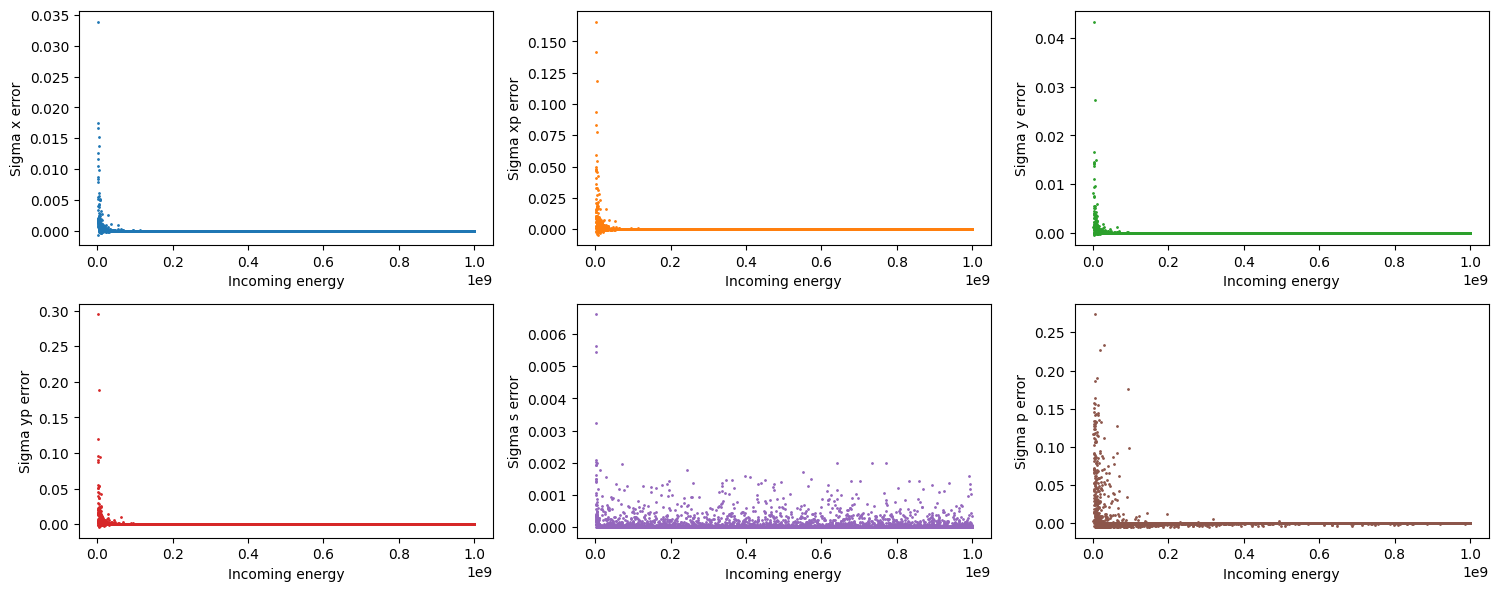

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(energies, sigma_x_errors, s=1, c="tab:blue")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(energies, sigma_xp_errors, s=1, c="tab:orange")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(energies, sigma_y_errors, s=1, c="tab:green")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(energies, sigma_yp_errors, s=1, c="tab:red")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(energies, sigma_s_errors, s=1, c="tab:purple")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(energies, sigma_p_errors, s=1, c="tab:brown")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

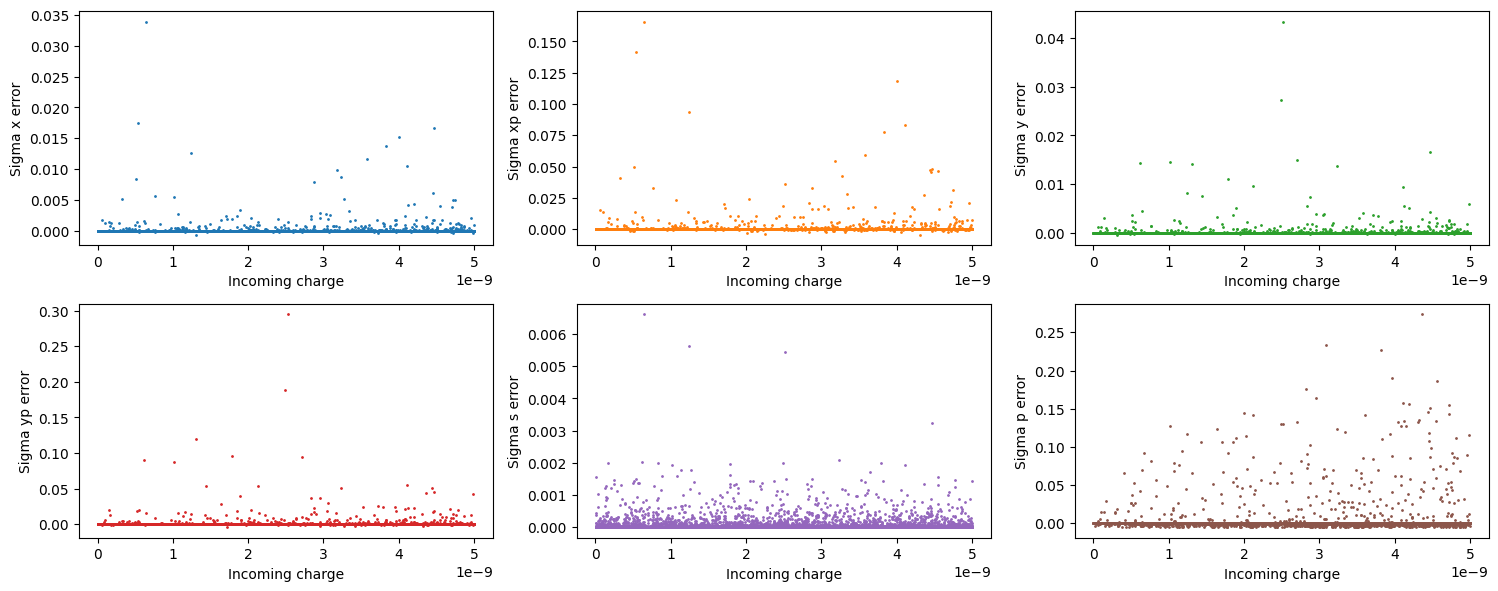

In [7]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(charges, sigma_x_errors, s=1, c="tab:blue")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(charges, sigma_xp_errors, s=1, c="tab:orange")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(charges, sigma_y_errors, s=1, c="tab:green")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(charges, sigma_yp_errors, s=1, c="tab:red")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(charges, sigma_s_errors, s=1, c="tab:purple")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(charges, sigma_p_errors, s=1, c="tab:brown")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

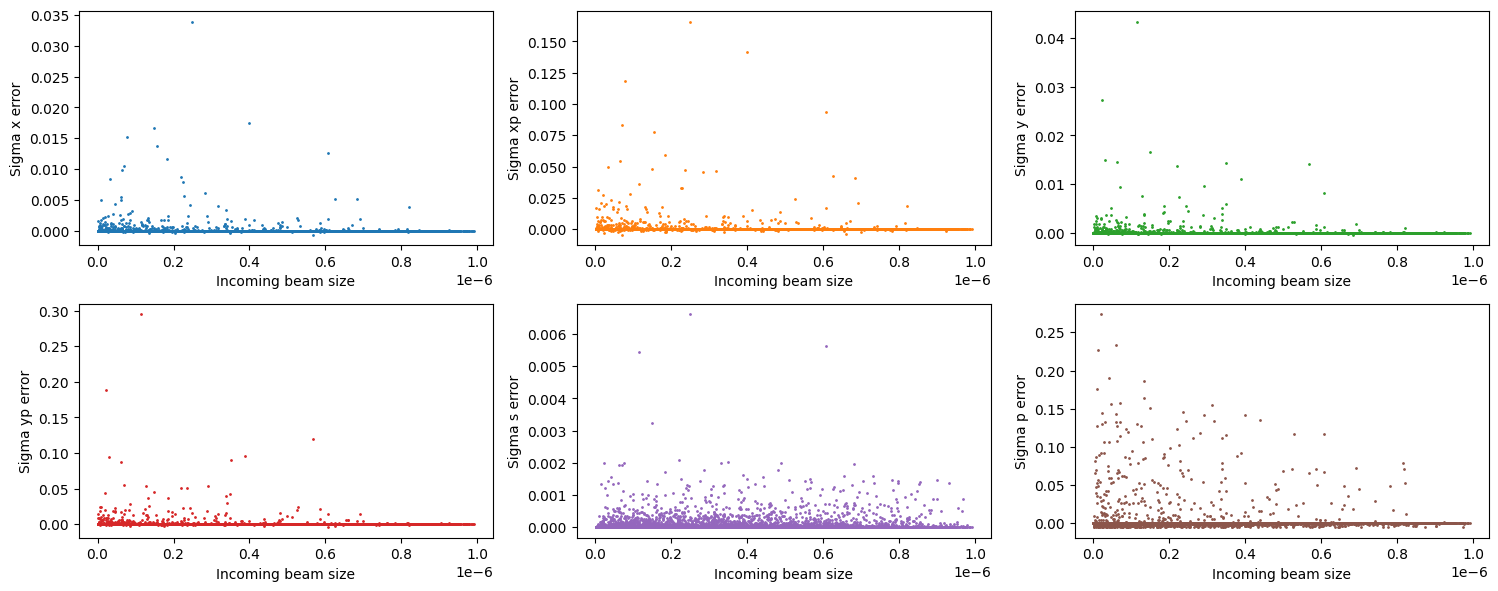

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_x_errors, s=1, c="tab:blue"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)],
    sigma_xp_errors,
    s=1,
    c="tab:orange",
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_y_errors, s=1, c="tab:green"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_yp_errors, s=1, c="tab:red"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_s_errors, s=1, c="tab:purple"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_p_errors, s=1, c="tab:brown"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

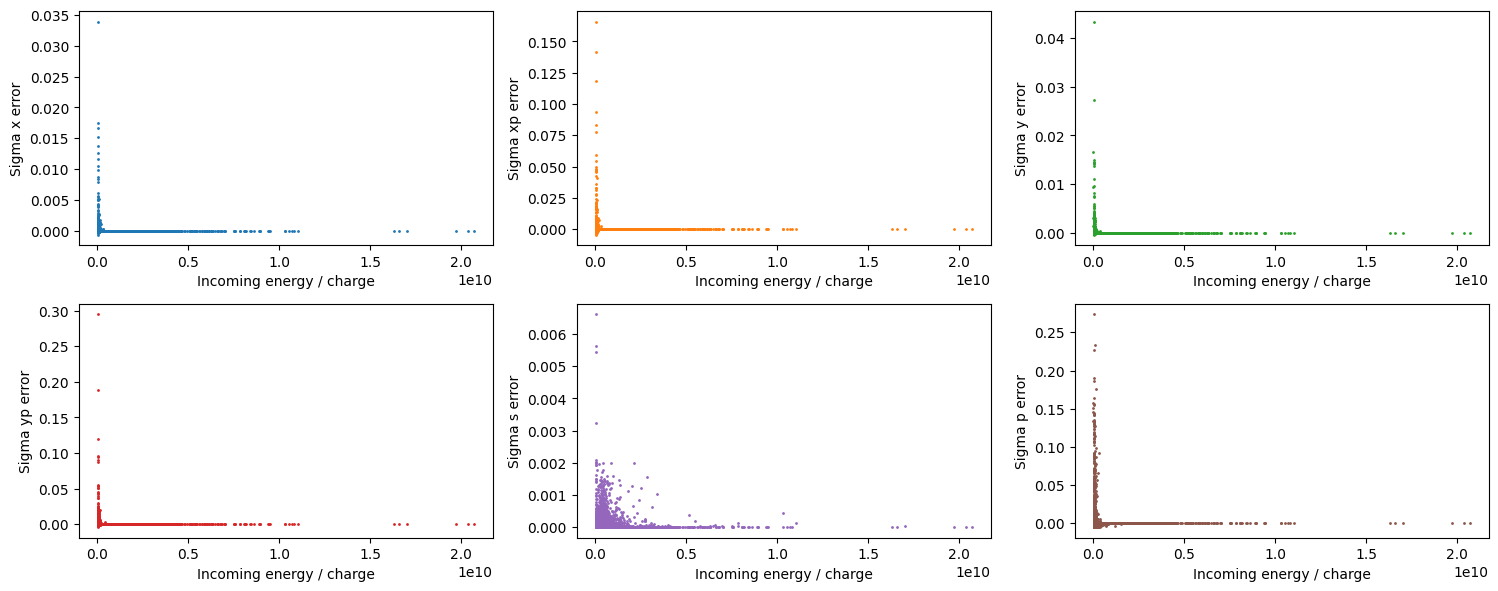

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_x_errors, s=1, c="tab:blue"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)),
    sigma_xp_errors,
    s=1,
    c="tab:orange",
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_y_errors, s=1, c="tab:green"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_yp_errors, s=1, c="tab:red"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_s_errors, s=1, c="tab:purple"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_p_errors, s=1, c="tab:brown"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

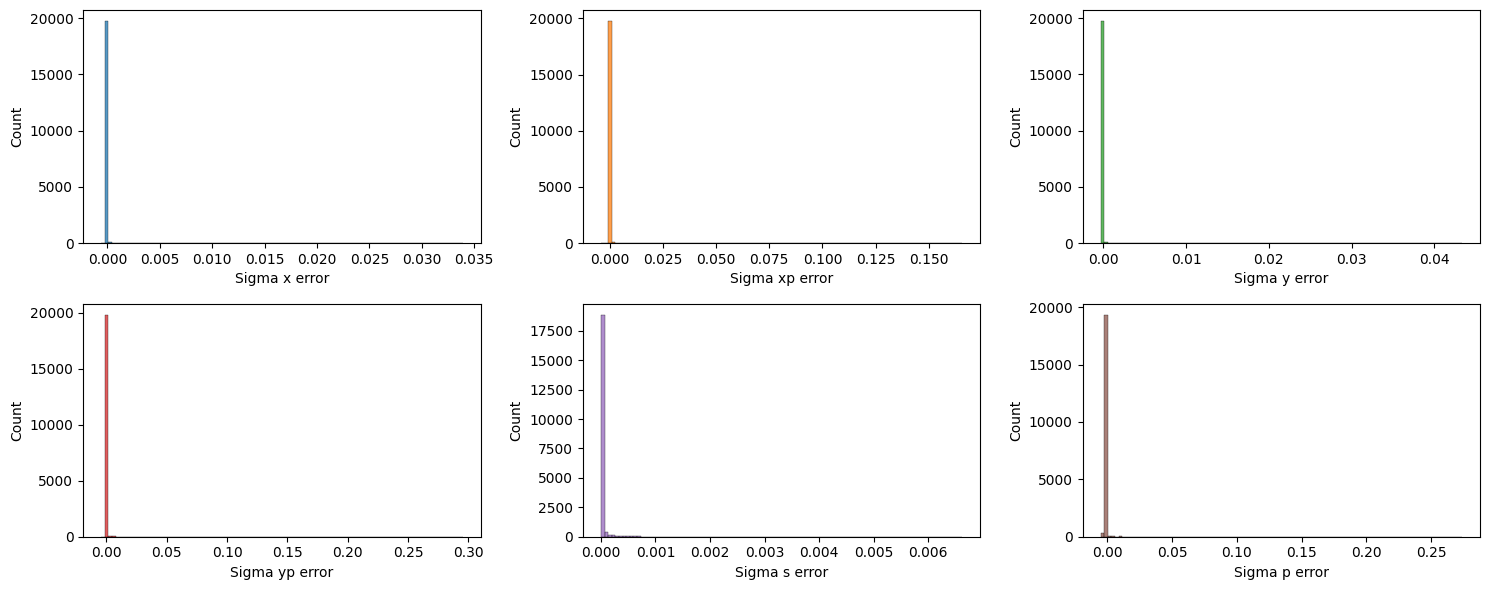

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
sns.histplot(x=sigma_x_errors, bins=100, color="tab:blue")
plt.xlabel("Sigma x error")
plt.subplot(2, 3, 2)
sns.histplot(x=sigma_xp_errors, bins=100, color="tab:orange")
plt.xlabel("Sigma xp error")
plt.subplot(2, 3, 3)
sns.histplot(x=sigma_y_errors, bins=100, color="tab:green")
plt.xlabel("Sigma y error")
plt.subplot(2, 3, 4)
sns.histplot(x=sigma_yp_errors, bins=100, color="tab:red")
plt.xlabel("Sigma yp error")
plt.subplot(2, 3, 5)
sns.histplot(x=sigma_s_errors, bins=100, color="tab:purple")
plt.xlabel("Sigma s error")
plt.subplot(2, 3, 6)
sns.histplot(x=sigma_p_errors, bins=100, color="tab:brown")
plt.xlabel("Sigma p error")
plt.tight_layout()
plt.show()

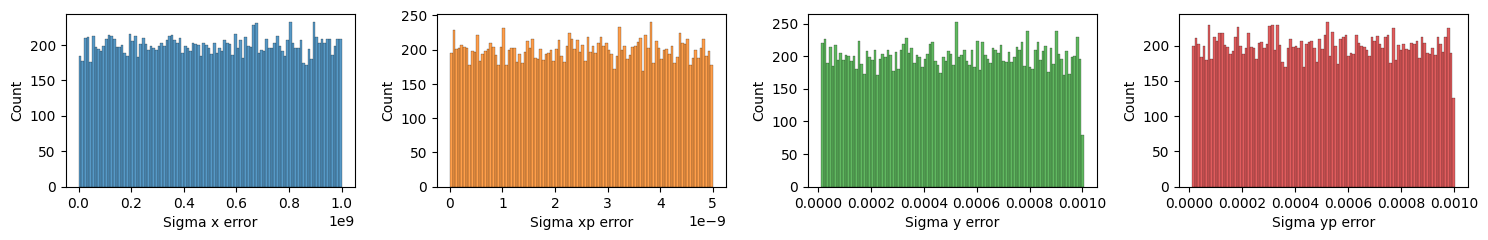

In [12]:
plt.figure(figsize=(15, 2.5))

plt.subplot(1, 4, 1)
sns.histplot(x=energies, bins=100, color="tab:blue")
plt.xlabel("Sigma x error")
plt.subplot(1, 4, 2)
sns.histplot(x=charges, bins=100, color="tab:orange")
plt.xlabel("Sigma xp error")
plt.subplot(1, 4, 3)
sns.histplot(x=sigma_xs, bins=100, color="tab:green")
plt.xlabel("Sigma y error")
plt.subplot(1, 4, 4)
sns.histplot(x=sigma_ys, bins=100, color="tab:red")
plt.xlabel("Sigma yp error")
plt.tight_layout()
plt.show()